### Assignment
#### 771768 - Introduction to Programming for Artificial Intelligence and Data Science
##### Customer Data Pre-processing

### Tasks
### Data Processing (70%)

### 1. Read in the provided ACW Data using the CSV library.

In [1]:
import csv # Importing CSV Library
import json # Importing JSON Library
from datetime import datetime # Import datetime Library

In [2]:
# Reading The Provided ACW Data using the CSV Library.
acwUserData = 'acw_user_data.csv' # Assigning the CSV file to a variable
with open(acwUserData) as csvFile: # Opening the CSV file
    csvReader = csv.reader( csvFile, delimiter=',' )
    for rowNumber, row in enumerate (csvReader): # Check for rowNumber and row in csv file
        print(rowNumber, row) # Print out the content of our CSV file line by line

0 ['Address Street', 'Address City', 'Address Postcode', 'Age (Years)', 'Distance Commuted to Work (Km)', 'Employer Company', 'Credit Card Start Date', 'Credit Card Expiry Date', 'Credit Card Number', 'Credit Card CVV', 'Dependants', 'First Name', 'Bank IBAN', 'Last Name', 'Marital Status', 'Yearly Pension (GBP)', 'Retired', 'Yearly Salary (GBP)', 'Sex', 'Vehicle Make', 'Vehicle Model', 'Vehicle Year', 'Vehicle Type']
1 ['70 Lydia isle', 'Lake Conor', 'S71 7XZ', '89', '0', 'N/A', '08/18', '11/27', '676373692463', '875', '3', 'Kieran', 'GB62PQKB71416034141571', 'Wilson', 'married or civil partner', '7257', 'True', '72838', 'Male', 'Hyundai', 'Bonneville', '2009', 'Pickup']
2 ['00 Wheeler wells', 'Chapmanton', 'L2 7BT', '46', '13.72', 'Begum-Williams', '08/12', '11/26', '4529436854129855', '583', '1', 'Jonathan', 'GB37UMCO54540228728019', 'Thomas', 'married or civil partner', '0', 'False', '54016', 'Male', 'Nissan', 'ATS', '1996', 'Coupe']
3 ['Studio 33K Joel walk', 'Randallborough', 'ME

In [3]:
print(csvReader) # check the csv object
print(type(csvReader)) # Checking and printing the file type

<class '_csv.reader'>


#### 2. As a CSV file is an entirely flat file structure, we need to convert our data back into its rich structure. Convert all flat structures into nested structures. These are notably:
    a. Vehicle - consists of make, model, year, and type

    b. Credit Card - consists of start date, end date, number, security code, and IBAN.

    c. Address - consists of the main address, city, and postcode.

For this task, it may be worthwhile inspecting the CSV headers to see which data
columns may correspond to these above.
##### Note: Ensure that the values read in are appropriately cast to their respective types.

In [4]:
# Creating variables to hold all .json files and filename we are saving Our Nested Structures to
vehiclesNestedStructureData = 'vehicles.json'
creditCardNestedStructureData = 'creditcard.json'
addressNestedStructureData = 'address.json'
allProcessedData = 'processed.json'
allRetiredData = 'retired.json'
allEmployedData = 'employed.json'
removedCustomerData = 'remove_ccard.json'
commuteData = 'commute.json'

In [5]:
# Inspecting CSV headers to see which data columns correspond with the ones for our tasks
with open(acwUserData, 'r') as csvFile:
    csvReader = csv.reader( csvFile, delimiter=',' ) # Read CSV file
    for rowNumber, rows in enumerate (csvReader): # Checking for headers and row number in CSV file
        if rowNumber == 0: # Condition to check if row number is 0
            acwUserDataHeader = rows # If it is true assign the row to a variable
print(acwUserDataHeader) # Printing out the content of the row 0


['Address Street', 'Address City', 'Address Postcode', 'Age (Years)', 'Distance Commuted to Work (Km)', 'Employer Company', 'Credit Card Start Date', 'Credit Card Expiry Date', 'Credit Card Number', 'Credit Card CVV', 'Dependants', 'First Name', 'Bank IBAN', 'Last Name', 'Marital Status', 'Yearly Pension (GBP)', 'Retired', 'Yearly Salary (GBP)', 'Sex', 'Vehicle Make', 'Vehicle Model', 'Vehicle Year', 'Vehicle Type']


##### a. Vehicle - consists of make, model, year, and type

In [6]:
with open(acwUserData, mode = 'r') as csvFile: # Opening  the CSV file and prepare to read content
    nestedReader = csv.reader(csvFile) # Read csv file
    next(nestedReader)  #To skip the header column
    vehicleNestedStructure = {'Vehicles':[]} # Variable to hold nested structure records of vehicles from CSV 
    for row in nestedReader: # Checking row in CSV file
        vehicleNestedStructure['Vehicles'].append({  # Append vehicle details for each row to the vehicleNestedStructure variable 
            'Vehicle Make':row[19],
            'Vehicle Model':row[20], 
            'Vehicle Year':row[21], 
            'Vehicle Type':row[22] 
        })
try:    
    with open(vehiclesNestedStructureData, mode = 'w') as csvFile: # Get the vehicles details we just append and prepare to write 
        json.dump(vehicleNestedStructure, csvFile, indent = 4) # Write all generated vehicle details into vehicleNestedStructure(vehicles.json) file
        print('Vehicles.json has been file created Successfully')    # Print when successful 
except Exception as error:
    print('Failed to create Vehicles.json file') # Print when unsuccessful
    print(type(error))

Vehicles.json has been file created Successfully


##### b. Credit Card - consists of start date, end date, number, security code, and IBAN.

In [7]:
with open(acwUserData, mode = 'r') as csvFile: # Opening  the CSV file and prepare to read content
    nestedReader = csv.reader(csvFile) # Read csv file
    next(nestedReader)  #To skip the header column
    creditCardNestedStructure = {'Credit Card':[]}  # Variable to hold nested structure records of credit card from CSV 
    for row in nestedReader:
        creditCardNestedStructure['Credit Card'].append({ # Append Credit Card details for each row to the creditCardNestedStructure variable 
            'Start Date':row[6],
            'Expiry Date':row[7], 
            'Card Number':row[8], 
            'Card CVV':row[9], 
            'IBAN': row[12]
        })
try:        
    with open(creditCardNestedStructureData, mode = 'w') as csvFile:    # Get the Credit Card details we just append and prepare to write 
        json.dump(creditCardNestedStructure, csvFile, indent = 4)       # Write all generated Credit Card details into creditCardNestedStructure(creditCard.json) file
        print('creditcard.json has been file created Successfully')    # Print when successful 
except Exception as error:
    print('Failed to create creditcard.json file')                    # Print with error when unsuccessful 
    print(type(error))

creditcard.json has been file created Successfully


##### c. Address - consists of the main address, city, and postcode.

In [8]:
with open(acwUserData, mode = 'r') as csvFile:    # Opening  the CSV file and prepare to read content
    nestedReader = csv.reader(csvFile)            # Read csv file
    next(nestedReader)  #To skip the header column
    addressNestedStructure = {'Address':[]} # Variable to hold nested structure records of address from CSV 
    for row in nestedReader:
        addressNestedStructure['Address'].append({ # Append address details for each row to the addressNestedStructure variable 
            'Street':row[0],
            'City':row[1], 
            'Postcode':row[2]
        })
try:        
    with open(addressNestedStructureData, mode = 'w') as csvFile:  # Get the Address details we just append and prepare to write 
        json.dump(addressNestedStructure, csvFile, indent = 4)     # Write all generated Credit Card details into addressNestedStructure(address.json) file
        print('Address.json has been file created Successfully')    # Print when successful 
except Exception as error:
    print('Failed to create Address.json file')                     # Print when unsuccessful 
    print(type(error))

Address.json has been file created Successfully


#### 3.The client informs you that they have had difficulty with errors in the dependants column. Some entries are empty (i.e. “ “ or “”), which may hinder your conversion from Task 2. These should be changed into something meaningful when encountered.

In [9]:
emptyDependant = []                            # Variable to hold dependant error content  
with open(acwUserData, mode='r') as csvFile:   # Opening  the CSV file and prepare to read content
    dependantReader = csv.reader(csvFile)      # Reading in CSV file
    for rowNumber, row in enumerate(dependantReader, start = 1): # Check through rowNumber and row in dependants column of CSV file, starting at Row 1
        if row[10]=='':      # Check if dependant column has empty value
            row[10]='0'      # Replace any empty value with 0
            emptyDependant.append(rowNumber) # Appending rowNumber of changed rows to the emptyDependant Variable

##### Print a list where all such error corrections take place.
    E.g. Problematic rows for dependants: [16, 58, 80, 98]

In [10]:
# Printing all changed empty dependant value index(rowNumber)
emptyDependant

[23,
 111,
 181,
 207,
 272,
 274,
 276,
 360,
 462,
 470,
 581,
 638,
 681,
 727,
 824,
 867,
 919,
 933,
 985]

#### 4. Write all records to a processed.json file in the JSON data format. This should be a list of dictionaries, where each index of the list is a dictionary representing a singular person.

In [11]:
with open(acwUserData, mode = 'r') as csvFile: # Opening  the CSV file and prepare to read content
    nestedReader = csv.reader(csvFile)  # Read csv file
    next(nestedReader)  #To skip the header column
    processedNestedStructure = [] # Create Variable to hold nested structure records of processed json data format from CSV 
    for row in nestedReader:    # Checking through rows
        processedNestedStructure.append({  # Append processed json data format to the processedNestedStructure variable 
            'First Name': row[11], 
            'Last Name': row[13], 
            'Age': row[3], 
            'Sex': row[18], 
            'Retired': row[16], 
            'Marital Status': row[14],
            'Dependants': row[10],
            'Salary': row[17],
            'Pension': row[15],
            'Company': row[5],
            'Commmute Distance': row[4],
            'Vehicles': {
                'Vehicle Make':row[19],'Vehicle Model':row[20], 'Vehicle Year':row[21], 'Vehicle Type':row[22],
            },
            'Credit Card': {
                'Start Date':row[6],'Expiry Date':row[7], 'Card Number':row[8], 'Card CVV':row[9], 'IBAN': row[12],
            },
            'Address': {
                'Street':row[0],'City':row[1], 'Postcode':row[2],
            } 
        })
try:
    with open(allProcessedData, mode = 'w') as csvFile: # Create and Open processed json file so we can write into it
        json.dump(processedNestedStructure, csvFile, indent = 4) # Write all processedNestedStructure data into it
    print('Processed.json has been file created Successfully')    # Print when successful 
except Exception as error:
    print('Failed to create Processed.json file')  # Print when unsuccessful 
    print(type(error))

Processed.json has been file created Successfully


#### 5. You should create two additional file outputs, retired.json and employed.json, these should contain all retired customers (as indicated by the retired field in the CSV), and all employed customers respectively (as indicated by the employer field in the CSV) and be in the JSON data format.

In [12]:
with open(acwUserData, mode = 'r') as csvFile:
    nestedReader = csv.reader(csvFile)
    next(nestedReader)  #To skip the header column
    retiredOutput = {'Retired' :[]}   # Variable to hold nested data structure records of retired gotten from CSV 
    employedOutput = {'Employed' :[]}  # Variable to hold nested data structure records of employed gotten from CSV 
    for row in nestedReader:    # Check through the row
        if row[16] == 'True':   # If Retired row has True value append the row
            retiredOutput['Retired'].append({ # we append the row to the retiredOutput Variable
                'First Name': row[11], 
                'Last Name': row[13], 
                'Age': row[3], 
                'Sex': row[18], 
                'Retired': row[16], 
                'Marital Status': row[14],
                'Dependants': row[10],
                'Salary': row[17],
                'Pension': row[15],
                'Company': row[5],
                'Commmute Distance': row[4],
                'Vehicles': {
                    'Vehicle Make':row[19],'Vehicle Model':row[20], 'Vehicle Year':row[21], 'Vehicle Type':row[22],
                },
                'Credit Card': {
                    'Start Date':row[6],'Expiry Date':row[7], 'Card Number':row[8], 'Card CVV':row[9], 'IBAN': row[12],
                },
                'Address': {
                    'Street':row[0],'City':row[1], 'Postcode':row[2],
                } 
        })

        else: # If Retired row has False as value then append the row to the employedOutput Variable
            employedOutput['Employed'].append({
                'First Name': row[11], 
                'Last Name': row[13], 
                'Age': row[3], 
                'Sex': row[18], 
                'Retired': row[16], 
                'Marital Status': row[14],
                'Dependants': row[10],
                'Salary': row[17],
                'Pension': row[15],
                'Company': row[5],
                'Commmute Distance': row[4],
                'Vehicles': {
                    'Vehicle Make':row[19],'Vehicle Model':row[20], 'Vehicle Year':row[21], 'Vehicle Type':row[22],
                },
                'Credit Card': {
                    'Start Date':row[6],'Expiry Date':row[7], 'Card Number':row[8], 'Card CVV':row[9], 'IBAN': row[12],
                },
                'Address': {
                    'Street':row[0],'City':row[1], 'Postcode':row[2],
                } 
            })

In [13]:
# Create retired.json file
try:
    with open(allRetiredData, mode = 'w') as csvFile: # Opening file to write  file
        json.dump(retiredOutput, csvFile, indent = 4)  # Writing employedOutput into file
    print('retired.json file has been created Successfully')    # If created Succesfully
except Exception as error:
    print('Failed to create retired.json file')# If UnSuccesful
    print(type(error))

retired.json file has been created Successfully


In [14]:
# Create employed.json file
try:
    with open(allEmployedData, mode = 'w') as csvFile:   # Opening file to write  file
        json.dump(employedOutput, csvFile, indent = 4)   # Writing employedOutput into file
    print('employed.json file has been created Successfully')    # If created Succesfully
except Exception as error:
    print('Failed to create employed.json file')  # If unSuccesfull
    print(type(error))

employed.json file has been created Successfully


#### 6. The client states that there may be some issues with credit card entries. Any customers that have more than 10 years between their start and end date need writing to a separate file, called remove_ccard.json, in the JSON data format. The client will manually deal with these later based on your output. They request that you write a function to help perform this, which accepts a single row from the CSV data, and outputs whether the row should be flagged. This can then be used when determining whether to write the current person to the remove_ccard file.

In [15]:
# Function to remove customer card 
def removedCustomerCard (rows):
    try:
        creditStarDate = datetime.strptime(row[6], '%m/%y') 
        creditEndDate = datetime.strptime(row[7], '%m/%y')
    except ValueError:
        return False
    calculateDifference = creditEndDate - creditStarDate # Check the difference
    differenceDivision = calculateDifference.days/365 # Difference divided by 365
    if differenceDivision > 10: # If difference is greater than 10, we return True 
        return True
    else:
        if differenceDivision <= 10:# If difference is less than or equal 10, we return False 
            return False
        

In [16]:
removedCustomerCardData = []
with open(acwUserData, mode = 'r') as csvFile: # Opening file to read CSV
    nestedReader = csv.reader(csvFile)  # Read the CSV content
    removeCCardList = [] # Variable to hold the nexted data
    for row in nestedReader: # Check rows
        if removedCustomerCard(rows) == True: # When this is true we append rows to removedCustomerCardData
            removedCustomerCardData.append({
            'First Name': row[11], 
            'Last Name': row[13], 
            'Age': row[3], 
            'Sex': row[18], 
            'Retired': row[16], 
            'Marital Status': row[14],
            'Dependants': row[10],
            'Salary': row[17],
            'Pension': row[15],
            'Company': row[5],
            'Commmute Distance': row[4],
            'Vehicles': {
                'Vehicle Make':row[19],'Vehicle Model':row[20], 'Vehicle Year':row[21], 'Vehicle Type':row[22],
            },
            'Credit Card': {
                'Start Date':row[6],'Expiry Date':row[7], 'Card Number':row[8], 'Card CVV':row[9], 'IBAN': row[12],
            },
            'Address': {
                'Street':row[0],'City':row[1], 'Postcode':row[2],
            } 
        })



In [17]:
# View all Romove Customer Card Data
removedCustomerCardData

[{'First Name': 'Jonathan',
  'Last Name': 'Thomas',
  'Age': '46',
  'Sex': 'Male',
  'Retired': 'False',
  'Marital Status': 'married or civil partner',
  'Dependants': '1',
  'Salary': '54016',
  'Pension': '0',
  'Company': 'Begum-Williams',
  'Commmute Distance': '13.72',
  'Vehicles': {'Vehicle Make': 'Nissan',
   'Vehicle Model': 'ATS',
   'Vehicle Year': '1996',
   'Vehicle Type': 'Coupe'},
  'Credit Card': {'Start Date': '08/12',
   'Expiry Date': '11/26',
   'Card Number': '4529436854129855',
   'Card CVV': '583',
   'IBAN': 'GB37UMCO54540228728019'},
  'Address': {'Street': '00 Wheeler wells',
   'City': 'Chapmanton',
   'Postcode': 'L2 7BT'}},
 {'First Name': 'Julian',
  'Last Name': 'Potter',
  'Age': '43',
  'Sex': 'Male',
  'Retired': 'False',
  'Marital Status': 'single',
  'Dependants': '3',
  'Salary': '96645',
  'Pension': '0',
  'Company': 'Clark Group',
  'Commmute Distance': '20.05',
  'Vehicles': {'Vehicle Make': 'Lexus',
   'Vehicle Model': 'S-Series',
   'Vehic

In [18]:
# Create remove_ccard.json file
try:
    with open(removedCustomerData, mode = 'w') as csvFile:
        json.dump(removedCustomerCardData, csvFile, indent = 4)
    print('remove_ccard.json file has been created Successfully')    
except Exception as error:
    print('Failed to create remove_ccard.json file')
    print(type(error))

remove_ccard.json file has been created Successfully


#### 7. You have been tasked with calculating some additional metrics which will be used for ranking customers. You should create a new data attribute for our customers called “Salary-Commute”. Reading in from processed.json:
    a. Add, and calculate appropriately, this new attribute. It should represent the Salary that a customer earns, per mile of their commute.
        i. Note: If a person travels 1 or fewer commute Km, then their salary-commute would be just their salary.
    b. Sort these records by that new metric, in ascending order.
    c. Store the output file out as a JSON format, for a commute.json file.

In [19]:
with open(allProcessedData, mode='r') as manifest:  # Opening file to read our processed json data  file
    processedJson = json.load(manifest)        # Load the json file

for row in processedJson: # Check through rows in processedJson
    commuteDistance = float(row['Commmute Distance']) # Assigning Commmute Distance to Variable   
    earnSalary = int(row['Salary'])    # Assigning Salary to Variable
    if commuteDistance <= 1: # Check if commuteDistance is less or equal 1
        row['Salary Commute'] = earnSalary # Then commute will be the same
        
    else:
        row['Salary Commute'] = earnSalary/commuteDistance    # Else we do a division between earnSalary and commute distance

In [20]:
# Sorting our data
sortData = sorted(
    processedJson,
    key = lambda x:x['Salary Commute']
    
)

print(sortData)

[{'First Name': 'Graeme', 'Last Name': 'Jackson', 'Age': '52', 'Sex': 'Male', 'Retired': 'False', 'Marital Status': 'single', 'Dependants': '2', 'Salary': '17046', 'Pension': '0', 'Company': 'Smith, Birch and Burke', 'Commmute Distance': '5.52', 'Vehicles': {'Vehicle Make': 'Chevrolet', 'Vehicle Model': 'Rally Wagon 1500', 'Vehicle Year': '2011', 'Vehicle Type': 'SUV'}, 'Credit Card': {'Start Date': '06/14', 'Expiry Date': '04/29', 'Card Number': '4713424668774153', 'Card CVV': '3053', 'IBAN': 'GB09ELJH35362236053720'}, 'Address': {'Street': 'Studio 9 Reid lights', 'City': 'South Ryan', 'Postcode': 'E27 9GY'}, 'Salary Commute': 3088.04347826087}, {'First Name': 'Janet', 'Last Name': 'Quinn', 'Age': '30', 'Sex': 'Female', 'Retired': 'False', 'Marital Status': 'married or civil partner', 'Dependants': '1', 'Salary': '17428', 'Pension': '0', 'Company': 'Wood-Davies', 'Commmute Distance': '5.64', 'Vehicles': {'Vehicle Make': 'Audi', 'Vehicle Model': 'Land Cruiser', 'Vehicle Year': '2000', 

In [21]:
try:
    with open(commuteData, mode='w') as manifest: # Opening file to write our commute json data  file
        json.dump( sortData, manifest, indent = 4 ) # Writing sorData into file
        print('commute.json file has been created succefully and saved to computer') # If created Succesfully
except Exception as error:
    print('Unsuccesful, failed to create commute.json field') # If not successfull
    print(type(error))
    

commute.json file has been created succefully and saved to computer


### 2) Data Visualisation (20%)

In [22]:
#Importing Python Libraries
import pandas as pd      # Import pandas as pd
import seaborn as sns    # Import seaborn as sns
import numpy as np       # Import numpy as np
import matplotlib.pyplot as plt

In [23]:
# Reading the ACW CSV file using Pandas and Seaborn
acwUserDataFrame = pd.read_csv('acw_user_data.csv')
print(type(acwUserDataFrame)) # Check file data ty


<class 'pandas.core.frame.DataFrame'>


In [24]:
# Lets check our data header columns...
acwUserDataFrame.columns

Index(['Address Street', 'Address City', 'Address Postcode', 'Age (Years)',
       'Distance Commuted to Work (Km)', 'Employer Company',
       'Credit Card Start Date', 'Credit Card Expiry Date',
       'Credit Card Number', 'Credit Card CVV', 'Dependants', 'First Name',
       'Bank IBAN', 'Last Name', 'Marital Status', 'Yearly Pension (GBP)',
       'Retired', 'Yearly Salary (GBP)', 'Sex', 'Vehicle Make',
       'Vehicle Model', 'Vehicle Year', 'Vehicle Type'],
      dtype='object')

#### 1. Obtain the Data Series for Salary, and Age, and calculate the following:
##### a. Mean Salary
##### b. Median Age

In [25]:
# Checking our CSV in Dataframe
acwUserDataFrame

,Address Street,Address City,Address Postcode,Age (Years),Distance Commuted to Work (Km),Employer Company,Credit Card Start Date,Credit Card Expiry Date,Credit Card Number,Credit Card CVV,...,Last Name,Marital Status,Yearly Pension (GBP),Retired,Yearly Salary (GBP),Sex,Vehicle Make,Vehicle Model,Vehicle Year,Vehicle Type
0,70 Lydia isle,Lake Conor,S71 7XZ,89,0.00,NaN,08/18,11/27,676373692463,875,...,Wilson,married or civil partner,7257,True,72838,Male,Hyundai,Bonneville,2009,Pickup
1,00 Wheeler wells,Chapmanton,L2 7BT,46,13.72,Begum-Williams,08/12,11/26,4529436854129855,583,...,Thomas,married or civil partner,0,False,54016,Male,Nissan,ATS,1996,Coupe
2,Studio 33K Joel walk,Randallborough,ME3N 1GH,22,16.02,Hill-Wright,11/19,07/27,4091726363083888495,422,...,Jones,married or civil partner,0,False,68049,Male,GMC,Achieva,2015,"Convertible, Coupe"
3,Studio 46S Bethany lights,East Reece,E10 9RJ,56,19.35,Green LLC,10/17,04/18,4671332769487632633,669,...,Shaw,married or civil partner,0,False,91337,Male,Scion,F150 SuperCrew Cab,1994,Pickup
4,Flat 3 Christine views,Fletcherstad,WS2 9SN,57,5.94,"Hill, Evans and Harrison",04/19,11/27,2245094149128526,659,...,O'Brien,married or civil partner,0,False,18446,Female,Buick,Outback,2020,SUV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Studio 6 Heather prairie,North Amelia,E9 0HB,48,18.44,Phillips-Pope,04/19,08/26,3563802099155576,908,...,Clark,married or civil partner,0,False,84645,Male,Saturn,Convertible,2015,Van/Minivan
996,Flat 3 Davies run,Greenshire,E7 4UJ,22,19.61,Hughes LLC,05/12,07/28,3591311819315276,675,...,Jones,married or civil partner,0,False,93314,Female,Toyota,Yukon,2015,Van/Minivan
997,Flat 7 Barber motorway,Burrowsshire,L62 8TA,38,6.66,Bailey Group,01/13,05/29,3584931475767707,679,...,Walker,single,0,False,20940,Female,Ford,S6,2020,Sedan
998,00 Tony forks,Abbiebury,NP4 1JL,45,18.13,Foster-Price,04/19,05/23,4090311300716168,775,...,Thomson,married or civil partner,0,False,82412,Male,Scion,Ram 1500 Quad Cab,2015,Pickup


In [26]:
# Obtaining the Data Series for Salary below:
salaryDataSeries = acwUserDataFrame['Yearly Salary (GBP)']
salaryDataSeries

0      72838
1      54016
2      68049
3      91337
4      18446
       ...  
995    84645
996    93314
997    20940
998    82412
999    25788
Name: Yearly Salary (GBP), Length: 1000, dtype: int64

In [27]:
# Obtaining the Data Series for Age below:

ageDataSeries = acwUserDataFrame['Age (Years)']
ageDataSeries

0      89
1      46
2      22
3      56
4      57
       ..
995    48
996    22
997    38
998    45
999    80
Name: Age (Years), Length: 1000, dtype: int64

In [28]:
# Calculating for the Mean Salary:
print( f"The Mean Salary For The Salary Data Series Is: {salaryDataSeries.mean()}" )

The Mean Salary For The Salary Data Series Is: 57814.078


In [29]:
# Calculating for the Median of Age:
print( f"The Median Salary For The Age Data Series Is: {ageDataSeries.median()}" )

The Median Salary For The Age Data Series Is: 54.0


#### 2. Perform univariate plots of the following data attributes:
##### a. Age, calculating how many bins would be required for a bin_width of 5.

In [30]:
# Performing univariate plots of the data attributes


Text(0.5, 1.0, 'Univariate Plots of Age')

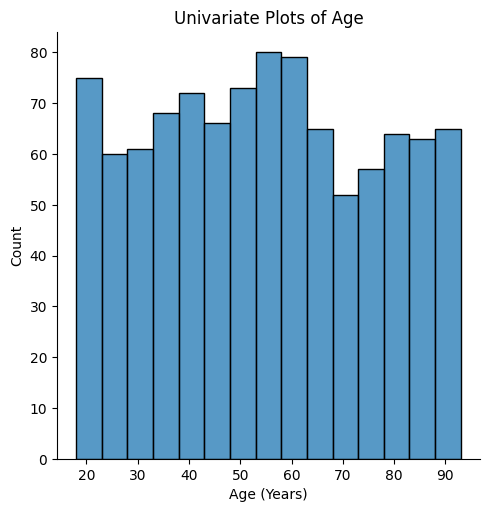

In [31]:
# Performing univariate plots of Age, calculating how many bins would be required for a bin_width of 5.
ageDataSeriesDisplot = sns.displot(ageDataSeries, binwidth = 5)
plt.title('Univariate Plots of Age')

##### For a bin_width of 5, 15 bins will be required. Like we have below;

Text(0.5, 1.0, 'Univariate Plots of Age When Bin is 15')

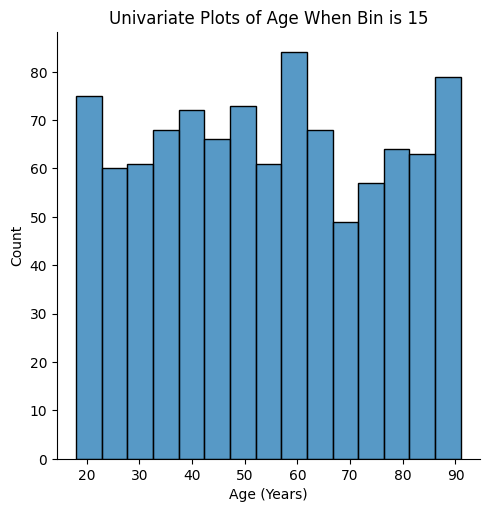

In [32]:
# Ploting for Age Dataseries with bins = 15
ageDataSeriesDisplotBins15 = sns.displot(ageDataSeries, bins = 15)
plt.title('Univariate Plots of Age When Bin is 15')

##### b. Dependents, fixing data errors with seaborn itself.

Text(0.5, 1.0, 'Univariate Plots of Dependants')

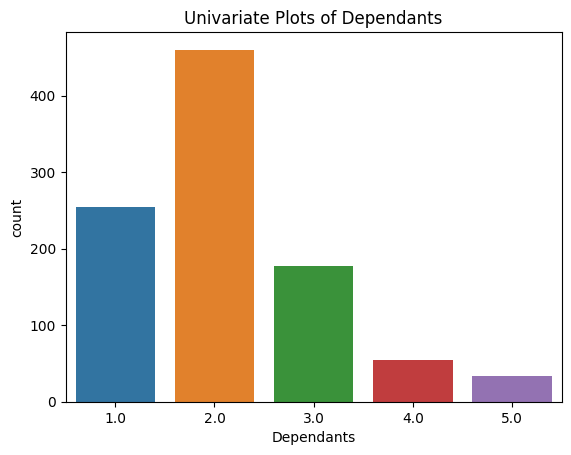

In [33]:
# Performing univariate plots of Dependents, fixing data errors with seaborn itself.
dependantsDataSeries = acwUserDataFrame['Dependants']
dependantsDataSeriesDisplot = sns.countplot(acwUserDataFrame,x='Dependants')
plt.title('Univariate Plots of Dependants')

##### c. Age (of default bins), conditioned on Marital Status

Text(0.5, 1.0, 'Univariate Plots of Age For Default Bins Using Marital Status')

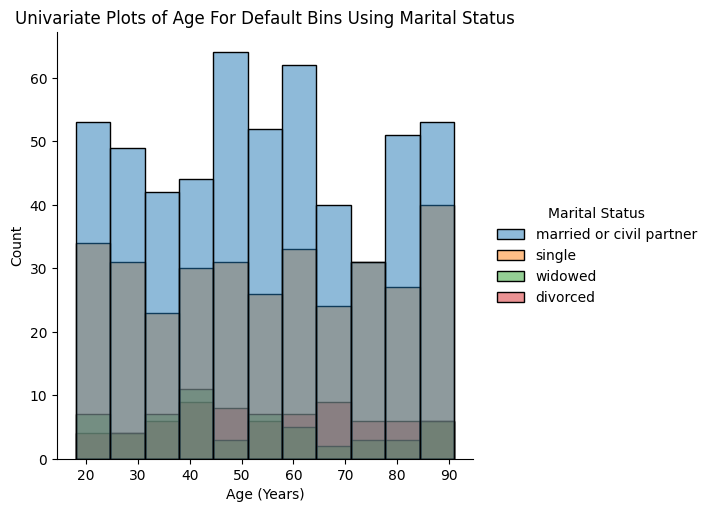

In [34]:
# Performing univariate plots of Age (of default bins), conditioned on Marital Status
maritalStatusDataSeries = acwUserDataFrame['Marital Status']
ageDefaultBinsByMaritalStatus = sns.displot(data = acwUserDataFrame, x = ageDataSeries, hue = maritalStatusDataSeries)
plt.title('Univariate Plots of Age For Default Bins Using Marital Status')

#### 3. Perform multivariate plots with the following data attributes:
##### a. Commuted distance against salary.

In [35]:
# Perform multivariate plots with the following data attributes:

Text(0.5, 1.0, 'Multivariate Plots of Commuted Distance Against Salary')

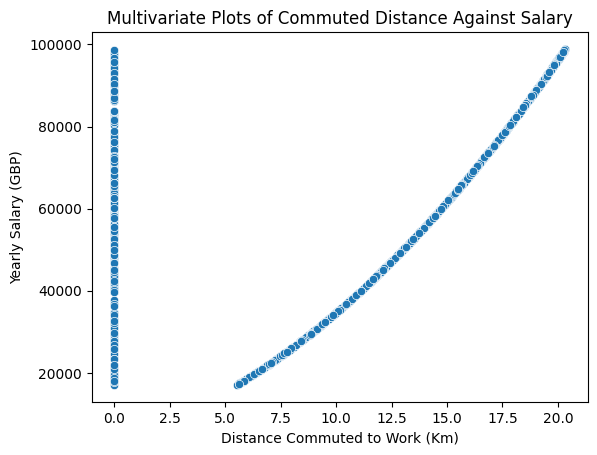

In [36]:
# Performing multivariate plots with the commuted distance against salary.
distanceCommutedDataSeries = acwUserDataFrame['Distance Commuted to Work (Km)']
commutedDistanceAgainstSalary = sns.scatterplot(data=acwUserDataFrame, x= distanceCommutedDataSeries, y=salaryDataSeries)
plt.title('Multivariate Plots of Commuted Distance Against Salary')

##### b. Age against Salary

Text(0.5, 1.0, 'Multivariate Plots Of Age Against Salary')

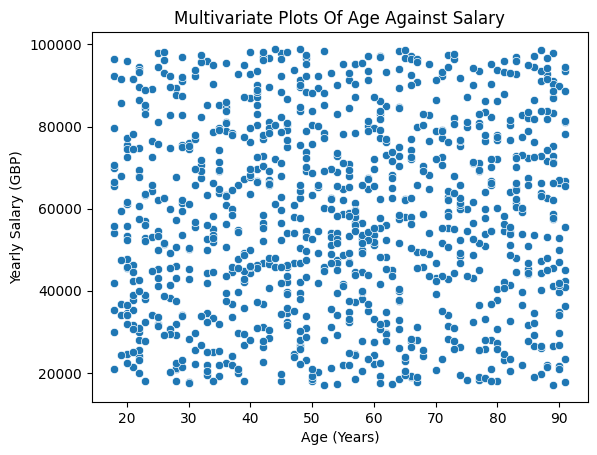

In [37]:
# Performing multivariate plots with the age against Salary
ageAgainstSalary = sns.scatterplot(data=acwUserDataFrame, x= ageDataSeries, y=salaryDataSeries)
plt.title('Multivariate Plots Of Age Against Salary')

##### c. Age against Salary conditioned by Dependants

Text(0.5, 1.0, 'Multivariate Plots Of Age Against Salary Conditioned By Dependants')

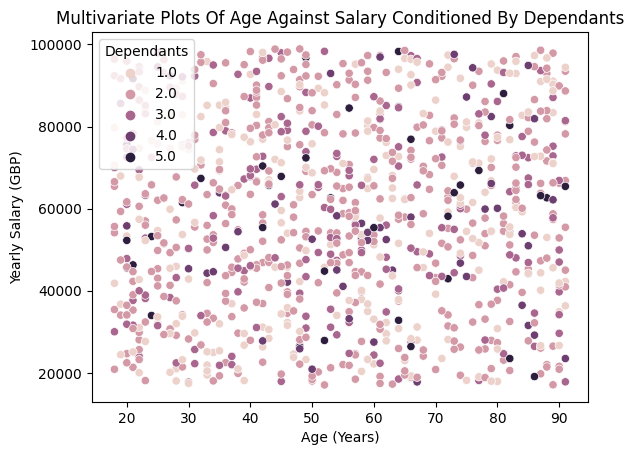

In [38]:
# Performing multivariate plots with the age against Salary conditioned by Dependants
ageAgainstSalaryByDependants = sns.scatterplot(data=acwUserDataFrame, x= ageDataSeries, y=salaryDataSeries, hue = dependantsDataSeries)
plt.title('Multivariate Plots Of Age Against Salary Conditioned By Dependants')

#### 4. Your client would like the ability to save the plots which you have produced. Provide a Notebook cell which can do this.

In [43]:
# All pictures of plot will be generated and save to computer
try:
    ageDataSeriesDisplot.savefig('./ageDataSeriesDisplot.png')
    ageDataSeriesDisplotBins15.savefig('./ageDataSeriesDisplotBin15.png')
    ageDefaultBinsByMaritalStatus.savefig('./ageDefaultBinsByMaritalStatus.png')

    # Axes Subplot object does not have the attribute require to use savefig directly so we need to call .get_figure() function
    dependantsDataSeriesDisplot.get_figure().savefig('./dependantsDataSeriesDisplot.png')
    ageAgainstSalary.get_figure().savefig('./ageAgainstSalary.png')
    commutedDistanceAgainstSalary.get_figure().savefig('./commutedDistanceAgainstSalary.png')
    ageAgainstSalaryByDependants.get_figure().savefig('./ageAgainstSalaryByDependants.png')
    print('All plots file have been saved as .png image succefully to computer')  # If successful Print when successful 
except Exception as error:                        # Checking for errors
    print('Unsuccesful, failed to save ')       # Then Print when successful 
    print(type(error))


All plots file have been saved as .png image succefully to computer
